In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings(action = 'ignore')

In [253]:
load_df = pd.read_csv('행정동_기준_동별데이터.csv')
load_df.drop('Unnamed: 0',axis=1,inplace=True)
load_df

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE
0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,...,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,종로구,청운효자동,1111051500
1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,...,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,종로구,사직동,1111053000
2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,...,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,종로구,삼청동,1111054000
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,...,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,종로구,부암동,1111055000
4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,...,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,종로구,평창동,1111056000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내2동,1174065000
422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내3동,1174066000
423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,...,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0,강동구,길동,1174068500
424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,...,5.500000,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,강동구,둔촌1동,1174069000


In [174]:
init_df = pd.read_csv('행정동_기준_동별데이터.csv')
init_df.drop('Unnamed: 0',axis=1,inplace=True)
init_df.set_index('DONG_CODE',inplace=True)
init_df

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG
DONG_CODE,,,,,,,,,,,,,,,,,,,,
1111051500,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,4.000000,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,종로구,청운효자동
1111053000,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,2.000000,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,종로구,사직동
1111054000,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,종로구,삼청동
1111055000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,종로구,부암동
1111056000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,종로구,평창동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174065000,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내2동
1174066000,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내3동
1174068500,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,16.000000,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0,강동구,길동


In [175]:
data = init_df.iloc[:,:-2]
data

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM
DONG_CODE,,,,,,,,,,,,,,,,,,
1111051500,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,4.000000,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0
1111053000,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,2.000000,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0
1111054000,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0
1111055000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0
1111056000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174065000,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0
1174066000,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0
1174068500,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,16.000000,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0


In [176]:
kmeans = KMeans(n_clusters=10, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(data)

KMeans(n_clusters=10, random_state=0)

In [177]:
df = init_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG
km_cluster,,,,,,,,,,,,,,,,,,,,
0,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125
1,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
5,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
6,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
7,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
8,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [178]:
df[df['km_cluster']==2]

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,km_cluster
DONG_CODE,,,,,,,,,,,,,,,,,,,,,
1168060000,0.50,4.00,0.0,0.50,0.25,20.0,0.25,14.50,13.00,405.00,...,5.00,62.5,5.0,91.75,2.75,21.0,0.25,강남구,대치1동,2
1168061000,0.50,4.00,0.0,0.50,0.25,20.0,0.25,14.50,13.00,405.00,...,5.00,62.5,5.0,91.75,2.75,21.0,0.25,강남구,대치2동,2
1168063000,0.50,4.00,0.0,0.50,0.25,20.0,0.25,14.50,13.00,405.00,...,5.00,62.5,5.0,91.75,2.75,21.0,0.25,강남구,대치4동,2
1168074000,1.75,4.25,0.0,0.75,0.25,35.0,0.50,19.25,19.75,480.25,...,13.25,89.0,8.5,199.00,7.00,31.5,0.25,강남구,일원2동,2


In [179]:
df[df['km_cluster']==3]

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,km_cluster
DONG_CODE,,,,,,,,,,,,,,,,,,,,,
1111061500,5.333333,13.333333,0.0,0.0,1.0,50.0,1.0,10.0,5.0,101.5,...,28.166667,243.166667,18.0,78.666667,20.333333,28.5,0.0,종로구,종로1.2.3.4가동,3
1114055000,2.000000,18.500000,0.0,1.0,3.0,0.0,0.0,18.0,3.0,16.0,...,26.000000,274.000000,7.0,120.500000,44.000000,45.0,1.0,중구,명동,3
1154551000,3.000000,9.000000,0.0,1.0,4.0,10.0,4.0,24.0,13.0,36.0,...,27.000000,212.000000,19.0,93.000000,19.000000,85.0,0.0,금천구,가산동,3
1156054000,4.000000,19.000000,0.0,0.0,1.0,70.0,0.0,27.0,25.0,100.0,...,44.000000,255.000000,11.0,106.000000,80.000000,53.0,1.0,영등포구,여의동,3


In [180]:
df[df['km_cluster']==8]

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,km_cluster
DONG_CODE,,,,,,,,,,,,,,,,,,,,,
1144066000,0.5,8.5,0.0,3.5,1.0,10.0,1.0,39.5,4.0,213.5,...,12.0,254.5,24.0,125.0,7.5,50.5,0.0,마포구,서교동,8
1168051000,0.5,4.5,0.0,0.5,1.0,5.0,0.0,29.5,14.5,253.0,...,6.5,130.0,4.0,144.0,8.5,33.0,1.5,강남구,신사동,8
1168054500,0.5,4.5,0.0,0.5,1.0,5.0,0.0,29.5,14.5,253.0,...,6.5,130.0,4.0,144.0,8.5,33.0,1.5,강남구,압구정동,8
1168064000,2.0,12.5,0.0,1.0,1.0,30.0,1.0,45.0,33.0,194.0,...,11.5,251.5,19.0,215.0,7.0,81.0,0.0,강남구,역삼1동,8
1168065000,2.0,12.5,0.0,1.0,1.0,30.0,1.0,45.0,33.0,194.0,...,11.5,251.5,19.0,215.0,7.0,81.0,0.0,강남구,역삼2동,8


In [181]:
density_df = pd.read_excel('인구밀도.xlsx')
density_df['GU_DONG'] = density_df['GU'] + density_df["DONG"]
density_df

,GU,DONG,POP,AREA,DENSITY,GU_DONG
0,종로구,사직동,9636,1.23,7834,종로구사직동
1,종로구,삼청동,2739,1.49,1838,종로구삼청동
2,종로구,부암동,9782,2.27,4309,종로구부암동
3,종로구,평창동,18329,8.87,2066,종로구평창동
4,종로구,무악동,8297,0.36,23047,종로구무악동
...,...,...,...,...,...,...
421,강동구,천호2동,33753,1.57,21499,강동구천호2동
422,강동구,길동,45973,2.17,21186,강동구길동
423,강동구,강일동,32982,2.26,14594,강동구강일동
424,강동구,상일1동,38929,2.65,14690,강동구상일1동


In [182]:
gu_dong_df = load_df.copy()
gu_dong_df['GU_DONG'] = gu_dong_df['GU'] + gu_dong_df['DONG']
gu_dong_df

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE,GU_DONG
0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,...,39.666667,1.000000,56.666667,7.333333,2.000000,0.0,종로구,청운효자동,1111051500,종로구청운효자동
1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,...,100.666667,5.000000,41.666667,10.333333,10.000000,0.0,종로구,사직동,1111053000,종로구사직동
2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,...,52.000000,1.000000,22.000000,1.000000,1.000000,0.0,종로구,삼청동,1111054000,종로구삼청동
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,...,30.000000,5.000000,41.000000,5.000000,4.000000,0.0,종로구,부암동,1111055000,종로구부암동
4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,...,36.000000,0.000000,21.000000,10.000000,3.000000,0.0,종로구,평창동,1111056000,종로구평창동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내2동,1174065000,강동구성내2동
422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,47.666667,6.666667,52.000000,4.000000,19.333333,0.0,강동구,성내3동,1174066000,강동구성내3동
423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,...,63.000000,10.000000,119.000000,10.000000,38.000000,0.0,강동구,길동,1174068500,강동구길동
424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,...,17.500000,2.000000,32.500000,0.000000,8.500000,0.0,강동구,둔촌1동,1174069000,강동구둔촌1동


In [183]:
init_density_df = pd.merge(gu_dong_df, density_df)
init_density_df
# init_density_df.set_index('DONG_CODE',inplace=True)

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE,GU_DONG,POP,AREA,DENSITY
0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,...,7.333333,2.000000,0.0,종로구,청운효자동,1111051500,종로구청운효자동,12177,2.57,4738
1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,...,10.333333,10.000000,0.0,종로구,사직동,1111053000,종로구사직동,9636,1.23,7834
2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,...,1.000000,1.000000,0.0,종로구,삼청동,1111054000,종로구삼청동,2739,1.49,1838
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,...,5.000000,4.000000,0.0,종로구,부암동,1111055000,종로구부암동,9782,2.27,4309
4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,...,10.000000,3.000000,0.0,종로구,평창동,1111056000,종로구평창동,18329,8.87,2066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,4.000000,19.333333,0.0,강동구,성내2동,1174065000,강동구성내2동,24106,0.67,35979
422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,4.000000,19.333333,0.0,강동구,성내3동,1174066000,강동구성내3동,23346,0.71,32882
423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,...,10.000000,38.000000,0.0,강동구,길동,1174068500,강동구길동,45973,2.17,21186
424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,...,0.000000,8.500000,0.0,강동구,둔촌1동,1174069000,강동구둔촌1동,144,0.92,157


In [184]:
init_density_df

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,DONG_CODE,GU_DONG,POP,AREA,DENSITY
0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,...,7.333333,2.000000,0.0,종로구,청운효자동,1111051500,종로구청운효자동,12177,2.57,4738
1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,...,10.333333,10.000000,0.0,종로구,사직동,1111053000,종로구사직동,9636,1.23,7834
2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,...,1.000000,1.000000,0.0,종로구,삼청동,1111054000,종로구삼청동,2739,1.49,1838
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,...,5.000000,4.000000,0.0,종로구,부암동,1111055000,종로구부암동,9782,2.27,4309
4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,...,10.000000,3.000000,0.0,종로구,평창동,1111056000,종로구평창동,18329,8.87,2066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,4.000000,19.333333,0.0,강동구,성내2동,1174065000,강동구성내2동,24106,0.67,35979
422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,...,4.000000,19.333333,0.0,강동구,성내3동,1174066000,강동구성내3동,23346,0.71,32882
423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,...,10.000000,38.000000,0.0,강동구,길동,1174068500,강동구길동,45973,2.17,21186
424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,...,0.000000,8.500000,0.0,강동구,둔촌1동,1174069000,강동구둔촌1동,144,0.92,157


In [185]:
data2 = init_density_df.iloc[:,:-7]
data2

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM
0,0.333333,0.333333,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.000000,18.000000,4.000000,5.666667,39.666667,1.000000,56.666667,7.333333,2.000000,0.0
1,1.333333,7.333333,0.0,0.000000,0.0,10.000000,0.000000,18.0,3.000000,19.000000,2.000000,11.666667,100.666667,5.000000,41.666667,10.333333,10.000000,0.0
2,0.000000,1.000000,1.0,0.000000,0.0,10.000000,0.000000,3.0,0.000000,2.000000,0.000000,7.000000,52.000000,1.000000,22.000000,1.000000,1.000000,0.0
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.0,2.000000,24.000000,6.000000,5.000000,30.000000,5.000000,41.000000,5.000000,4.000000,0.0
4,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,5.0,5.000000,28.000000,0.000000,7.000000,36.000000,0.000000,21.000000,10.000000,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0
422,1.333333,1.333333,0.0,0.666667,0.0,16.666667,0.666667,10.0,4.666667,63.333333,5.333333,6.000000,47.666667,6.666667,52.000000,4.000000,19.333333,0.0
423,0.000000,2.000000,0.0,1.000000,0.0,20.000000,1.000000,18.0,9.000000,100.000000,16.000000,9.000000,63.000000,10.000000,119.000000,10.000000,38.000000,0.0
424,0.500000,0.000000,0.0,0.000000,0.5,0.000000,0.000000,4.0,3.000000,38.000000,3.000000,5.500000,17.500000,2.000000,32.500000,0.000000,8.500000,0.0


In [186]:
density_data = data2.div(init_density_df['DENSITY'], axis=0)
density_data

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM
0,0.000070,0.000070,0.000000,0.000211,0.000000,0.000000,0.000000,0.000000,0.000000,0.003799,0.000844,0.001196,0.008372,0.000211,0.011960,0.001548,0.000422,0.0
1,0.000170,0.000936,0.000000,0.000000,0.000000,0.001276,0.000000,0.002298,0.000383,0.002425,0.000255,0.001489,0.012850,0.000638,0.005319,0.001319,0.001276,0.0
2,0.000000,0.000544,0.000544,0.000000,0.000000,0.005441,0.000000,0.001632,0.000000,0.001088,0.000000,0.003808,0.028292,0.000544,0.011970,0.000544,0.000544,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000464,0.000464,0.005570,0.001392,0.001160,0.006962,0.001160,0.009515,0.001160,0.000928,0.0
4,0.000000,0.000484,0.000000,0.000000,0.000000,0.000000,0.000000,0.002420,0.002420,0.013553,0.000000,0.003388,0.017425,0.000000,0.010165,0.004840,0.001452,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.000037,0.000037,0.000000,0.000019,0.000000,0.000463,0.000019,0.000278,0.000130,0.001760,0.000148,0.000167,0.001325,0.000185,0.001445,0.000111,0.000537,0.0
422,0.000041,0.000041,0.000000,0.000020,0.000000,0.000507,0.000020,0.000304,0.000142,0.001926,0.000162,0.000182,0.001450,0.000203,0.001581,0.000122,0.000588,0.0
423,0.000000,0.000094,0.000000,0.000047,0.000000,0.000944,0.000047,0.000850,0.000425,0.004720,0.000755,0.000425,0.002974,0.000472,0.005617,0.000472,0.001794,0.0
424,0.003185,0.000000,0.000000,0.000000,0.003185,0.000000,0.000000,0.025478,0.019108,0.242038,0.019108,0.035032,0.111465,0.012739,0.207006,0.000000,0.054140,0.0


In [197]:
area_data = data2.div(init_density_df['AREA'], axis=0)
area_data

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM
0,0.129702,0.129702,0.000000,0.389105,0.000000,0.000000,0.000000,0.000000,0.000000,7.003891,1.556420,2.204929,15.434501,0.389105,22.049287,2.853437,0.778210,0.0
1,1.084011,5.962060,0.000000,0.000000,0.000000,8.130081,0.000000,14.634146,2.439024,15.447154,1.626016,9.485095,81.842818,4.065041,33.875339,8.401084,8.130081,0.0
2,0.000000,0.671141,0.671141,0.000000,0.000000,6.711409,0.000000,2.013423,0.000000,1.342282,0.000000,4.697987,34.899329,0.671141,14.765101,0.671141,0.671141,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.881057,0.881057,10.572687,2.643172,2.202643,13.215859,2.202643,18.061674,2.202643,1.762115,0.0
4,0.000000,0.112740,0.000000,0.000000,0.000000,0.000000,0.000000,0.563698,0.563698,3.156708,0.000000,0.789177,4.058625,0.000000,2.367531,1.127396,0.338219,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.990050,1.990050,0.000000,0.995025,0.000000,24.875622,0.995025,14.925373,6.965174,94.527363,7.960199,8.955224,71.144279,9.950249,77.611940,5.970149,28.855721,0.0
422,1.877934,1.877934,0.000000,0.938967,0.000000,23.474178,0.938967,14.084507,6.572770,89.201878,7.511737,8.450704,67.136150,9.389671,73.239437,5.633803,27.230047,0.0
423,0.000000,0.921659,0.000000,0.460829,0.000000,9.216590,0.460829,8.294931,4.147465,46.082949,7.373272,4.147465,29.032258,4.608295,54.838710,4.608295,17.511521,0.0
424,0.543478,0.000000,0.000000,0.000000,0.543478,0.000000,0.000000,4.347826,3.260870,41.304348,3.260870,5.978261,19.021739,2.173913,35.326087,0.000000,9.239130,0.0


In [231]:
kmeans = KMeans(n_clusters=6, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(density_data)

KMeans(n_clusters=6, random_state=0)

In [232]:
df = init_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG
km_cluster,,,,,,,,,,,,,,,,,,,,
0,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362,362
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
4,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
5,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [233]:
df[df['km_cluster']==7]

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,km_cluster
DONG_CODE,,,,,,,,,,,,,,,,,,,,,


In [234]:
df.describe()

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,km_cluster
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.607981,1.316901,0.166667,0.622066,0.204225,21.619718,0.518779,7.448357,3.629108,57.737089,4.178404,6.523474,37.985915,4.133803,53.603286,14.323944,13.650235,0.063380,0.586854
std,0.809103,2.206703,0.567719,0.503566,0.363035,18.668463,0.656479,7.034213,4.334411,56.280168,2.786655,4.725707,37.562957,3.156750,41.087587,14.060665,9.915998,0.207678,1.438370
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.833333,2.000000,0.000000,4.333333,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.000000,0.000000,0.000000,10.000000,0.000000,3.500000,1.333333,27.090909,2.700000,4.000000,19.541667,2.285714,25.946429,4.381250,8.857143,0.000000,0.000000
50%,0.366667,0.666667,0.000000,0.666667,0.000000,20.000000,0.333333,6.000000,2.500000,41.166667,4.000000,5.500000,27.363636,3.500000,41.375000,10.333333,11.333333,0.000000,0.000000
75%,0.833333,1.333333,0.000000,1.000000,0.285714,30.000000,0.729167,9.000000,4.500000,70.000000,5.000000,7.400000,39.250000,5.000000,65.731250,18.000000,14.729167,0.000000,0.000000
max,7.000000,19.000000,5.000000,3.500000,4.000000,170.000000,4.250000,60.000000,33.000000,480.250000,24.000000,44.000000,274.000000,24.000000,251.000000,101.000000,85.000000,1.500000,5.000000


In [235]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(density_data)
pca_transformed

array([[ 6.07130631e-03,  3.27243892e-03],
       [ 3.60097011e-03,  8.52591652e-03],
       [ 1.31167478e-02,  2.19270292e-02],
       [ 5.45349551e-03,  1.41795233e-03],
       [ 1.60810826e-02,  7.10370659e-03],
       [-5.96932905e-03, -1.13112977e-03],
       [-6.10186260e-03, -7.29675170e-04],
       [-1.50131282e-03,  4.11746845e-03],
       [ 5.47053275e-02,  4.31523643e-02],
       [-1.06574513e-03,  4.93303606e-03],
       [-1.86500194e-03,  3.25776258e-03],
       [-1.10479440e-03,  1.18094841e-03],
       [-6.19525936e-03, -6.48175872e-04],
       [-6.62836636e-03, -8.84076942e-04],
       [-6.53896060e-03, -8.35380165e-04],
       [-6.28388968e-03, -8.84540058e-04],
       [-6.35480183e-03, -9.06840043e-04],
       [ 2.27778336e-02,  2.43398907e-02],
       [ 9.61180324e-03,  1.32148708e-02],
       [ 4.76090108e-02,  5.73705735e-02],
       [ 1.79371463e-02,  1.48054831e-02],
       [ 4.62067167e-03,  2.01895185e-03],
       [ 6.15320353e-03,  1.09103239e-02],
       [ 1.

In [236]:
df['pca_x']=pca_transformed[:,0] #첫번째 값(X 좌표)
df['pca_y']=pca_transformed[:,1] #첫번째 값(y 좌표)
df.head(3)

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,km_cluster,pca_x,pca_y
DONG_CODE,,,,,,,,,,,,,,,,,,,,,
1111051500,0.333333,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18.0,...,1.0,56.666667,7.333333,2.0,0.0,종로구,청운효자동,4,0.006071,0.003272
1111053000,1.333333,7.333333,0.0,0.0,0.0,10.0,0.0,18.0,3.0,19.0,...,5.0,41.666667,10.333333,10.0,0.0,종로구,사직동,4,0.003601,0.008526
1111054000,0.000000,1.000000,1.0,0.0,0.0,10.0,0.0,3.0,0.0,2.0,...,1.0,22.000000,1.000000,1.0,0.0,종로구,삼청동,5,0.013117,0.021927


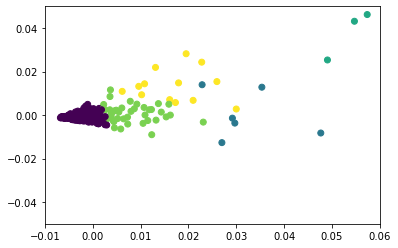

In [237]:
# 산점도로 표현 : 군집별로 다른 색상으로 표시
plt.xlim(-0.01,0.06)
plt.ylim(-0.05,0.05)
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['km_cluster'])

In [227]:
## 모든 데이터의 평균 실루엣 계수
from sklearn.metrics import silhouette_samples, silhouette_score
average_score = silhouette_score(density_data, df['km_cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score:0.405


In [240]:
kmeans = KMeans(n_clusters=6, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(area_data)

df = init_df.copy()
df['km_cluster'] = kmeans.labels_
df.groupby('km_cluster').count()

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG
km_cluster,,,,,,,,,,,,,,,,,,,,
0,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
1,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172,172
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
4,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [241]:
df[df['km_cluster']==2]

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,km_cluster
DONG_CODE,,,,,,,,,,,,,,,,,,,,,
1147053000,0.40,2.00,0.2,0.80,0.20,16.0,1.00,13.20,5.00,210.40,...,9.00,36.6,5.2,34.60,35.60,13.0,0.40,양천구,목3동,2
1147054000,0.40,2.00,0.2,0.80,0.20,16.0,1.00,13.20,5.00,210.40,...,9.00,36.6,5.2,34.60,35.60,13.0,0.40,양천구,목4동,2
1168060000,0.50,4.00,0.0,0.50,0.25,20.0,0.25,14.50,13.00,405.00,...,5.00,62.5,5.0,91.75,2.75,21.0,0.25,강남구,대치1동,2
1168063000,0.50,4.00,0.0,0.50,0.25,20.0,0.25,14.50,13.00,405.00,...,5.00,62.5,5.0,91.75,2.75,21.0,0.25,강남구,대치4동,2
1168074000,1.75,4.25,0.0,0.75,0.25,35.0,0.50,19.25,19.75,480.25,...,13.25,89.0,8.5,199.00,7.00,31.5,0.25,강남구,일원2동,2


In [242]:
df[df['km_cluster']==5]

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,km_cluster
DONG_CODE,,,,,,,,,,,,,,,,,,,,,
1153055000,0.8,1.4,0.0,1.2,0.2,20.0,0.4,7.8,4.0,35.4,...,7.4,44.6,7.8,146.8,51.2,18.6,0.2,구로구,구로4동,5
1153059500,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,...,1.0,9.0,2.0,208.0,11.0,7.0,0.0,구로구,가리봉동,5


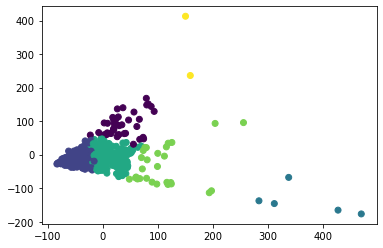

In [230]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(area_data)
pca_transformed

df['pca_x']=pca_transformed[:,0] #첫번째 값(X 좌표)
df['pca_y']=pca_transformed[:,1] #첫번째 값(y 좌표)
# 산점도로 표현 : 군집별로 다른 색상으로 표시
plt.scatter(x=df.loc[:,'pca_x'], y=df.loc[:,'pca_y'],c=df['km_cluster'])

In [238]:
## 모든 데이터의 평균 실루엣 계수
from sklearn.metrics import silhouette_samples, silhouette_score
average_score = silhouette_score(density_data, df['km_cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

붓꽃 데이터셋 Silhouette Analysis Score:0.639


In [245]:
cluster_1 = df[df['km_cluster']==1]
cluster_1_data = cluster_1.iloc[:,:-3]

In [249]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(cluster_1_data)

cluster_1['km_cluster'] = kmeans.labels_
cluster_1.groupby('km_cluster').count()

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,ANIMAL_HSPT_NUM,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG
km_cluster,,,,,,,,,,,,,,,,,,,,
0,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135
2,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [251]:
cluster_1[cluster_1['km_cluster']==0]

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,MC_NUM,KINDER_NUM,KIDS_NUM,GYM_NUM,GOLF_NUM,ACADEMY_NUM,...,BIKE_NUM,CAFE,CAR_SHR_NUM,CCTV_NUM,CHILD_MED_NUM,CON_NUM,DPTM_NUM,GU,DONG,km_cluster
DONG_CODE,,,,,,,,,,,,,,,,,,,,,
1120054000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,24.000000,...,10.000000,9.000000,5.000000,92.000000,20.000000,7.000000,0.000000,성동구,마장동,0
1123054500,0.000000,0.000000,0.0,1.000000,0.000000,10.000000,0.000000,9.000000,2.000000,35.000000,...,5.000000,29.000000,3.000000,96.000000,6.000000,17.000000,0.000000,동대문구,제기동,0
1126057000,0.500000,0.166667,0.0,0.666667,0.000000,20.000000,0.333333,4.000000,1.333333,28.500000,...,4.166667,20.666667,2.666667,94.000000,7.333333,14.500000,0.000000,중랑구,면목7동,0
1126057500,0.500000,0.166667,0.0,0.666667,0.000000,20.000000,0.333333,4.000000,1.333333,28.500000,...,4.166667,20.666667,2.666667,94.000000,7.333333,14.500000,0.000000,중랑구,면목3.8동,0
1126061000,1.500000,0.500000,0.0,0.500000,0.000000,10.000000,0.500000,3.500000,1.500000,23.000000,...,4.500000,20.500000,2.500000,73.000000,11.500000,16.000000,0.000000,중랑구,중화2동,0
1126065500,0.500000,0.500000,0.0,0.000000,0.500000,35.000000,0.500000,4.000000,1.500000,32.500000,...,6.500000,34.000000,3.000000,76.500000,15.000000,17.500000,0.000000,중랑구,망우본동,0
1129052500,0.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,6.000000,1.000000,49.000000,...,13.000000,43.000000,1.000000,138.000000,3.000000,10.000000,0.000000,성북구,성북동,0
1129064000,0.000000,0.000000,0.0,0.250000,0.000000,12.500000,0.500000,2.500000,2.500000,35.250000,...,2.500000,16.750000,1.750000,83.250000,6.250000,9.500000,0.000000,성북구,정릉3동,0
1129065000,0.000000,0.000000,0.0,0.250000,0.000000,12.500000,0.500000,2.500000,2.500000,35.250000,...,2.500000,16.750000,1.750000,83.250000,6.250000,9.500000,0.000000,성북구,정릉4동,0
